In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17072,-122.21,37.52,18.0,2962.0,945.0,1639.0,851.0,2.7399,87500.0,NEAR BAY
20409,-118.86,34.20,32.0,2399.0,384.0,1199.0,390.0,4.1250,264600.0,<1H OCEAN
19806,-123.41,40.07,17.0,449.0,151.0,141.0,53.0,0.8362,87500.0,INLAND
17423,-120.45,34.64,27.0,2696.0,622.0,1322.0,543.0,3.0352,135400.0,NEAR OCEAN
6085,-117.87,34.09,36.0,1267.0,191.0,640.0,200.0,5.2405,220000.0,<1H OCEAN
12446,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0,INLAND
18349,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,387500.0,NEAR OCEAN
440,-122.30,37.88,46.0,1647.0,376.0,854.0,355.0,2.9000,144800.0,NEAR BAY
5384,-118.40,34.02,27.0,515.0,201.0,397.0,228.0,2.4135,184400.0,<1H OCEAN
12383,-116.37,33.72,17.0,8626.0,1859.0,3497.0,1337.0,3.3120,121300.0,INLAND


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Data Visualization

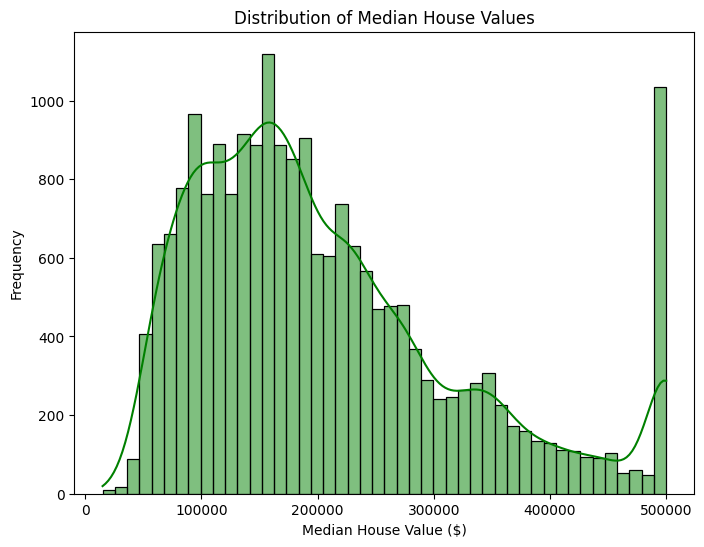

In [10]:
#1. Histogram of Median House Values
plt.figure(figsize = (8,6))
sb.histplot(df['median_house_value'], kde = True, color = 'green')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

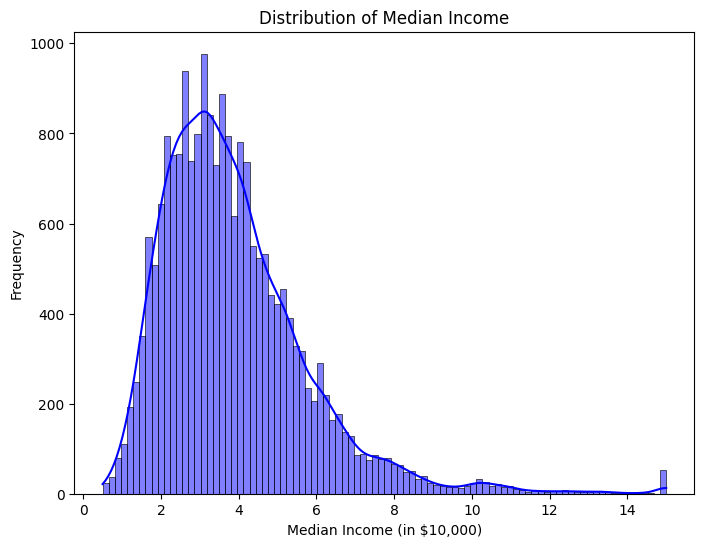

In [11]:
#2. Histogram of Median Income
plt.figure(figsize = (8,6))
sb.histplot(df['median_income'], kde = True, color = 'blue')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income (in $10,000)')
plt.ylabel('Frequency')
plt.show()

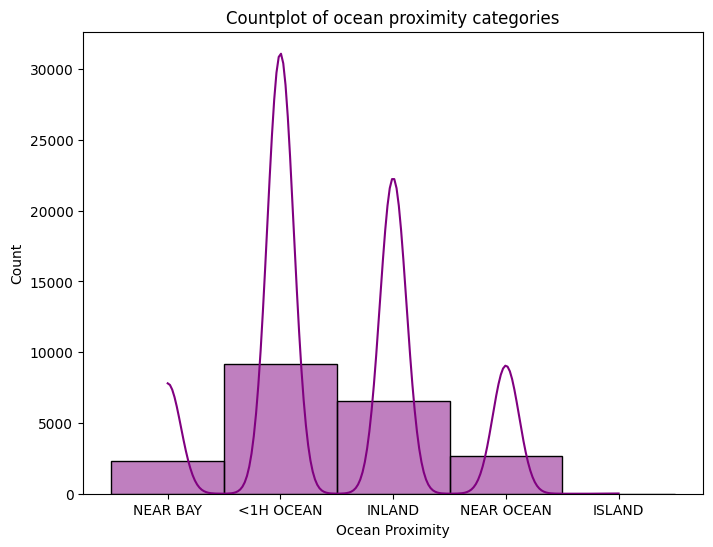

In [12]:
#3. Countplot of Ocean Proximity
plt.figure(figsize = (8,6))
sb.histplot(df['ocean_proximity'], kde = True, color = 'purple')
plt.title('Countplot of ocean proximity categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

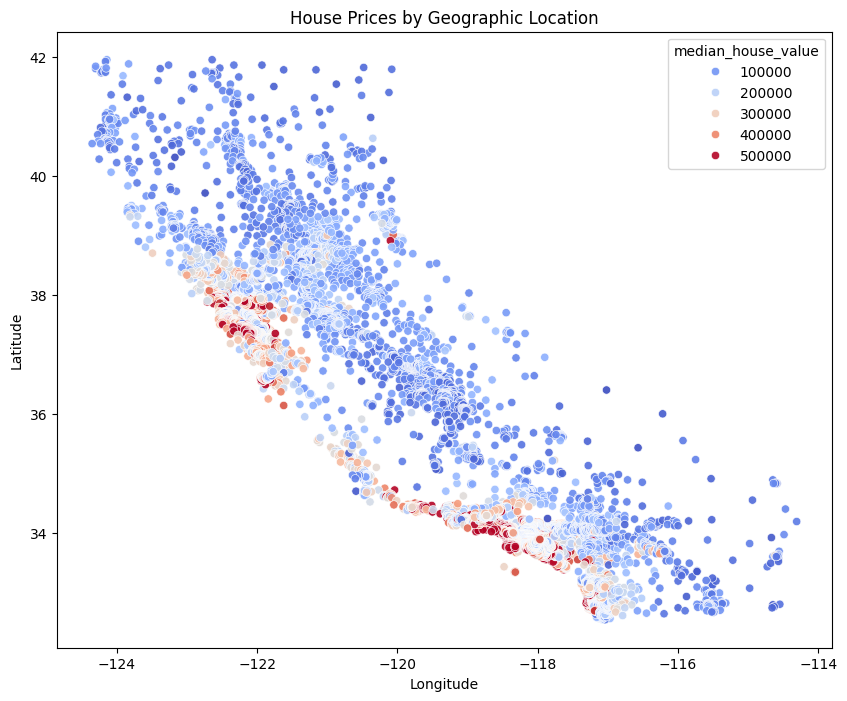

In [13]:
#4. Scatter plot of House Prices vs Latitude and Longitude
plt.figure(figsize = (10, 8))
sb.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value', palette = 'coolwarm', alpha = 0.9)
plt.title('House Prices by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Data Cleaning

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
#Handling Missing Values by Filling with Median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace = True)


In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
#List of Numerical Columns
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [19]:
#Plotting the Distribution for Numerical Features
def PlotDistribution(data, columns, title):
    plt.figure(figsize = (15,10))
    for i, col in enumerate(columns, 1):
        plt.subplot(3,3, i)
        sb.histplot(data[col], kde = True, color = 'blue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.suptitle(title, y = 1.02, fontsize = 16)
    plt.show()

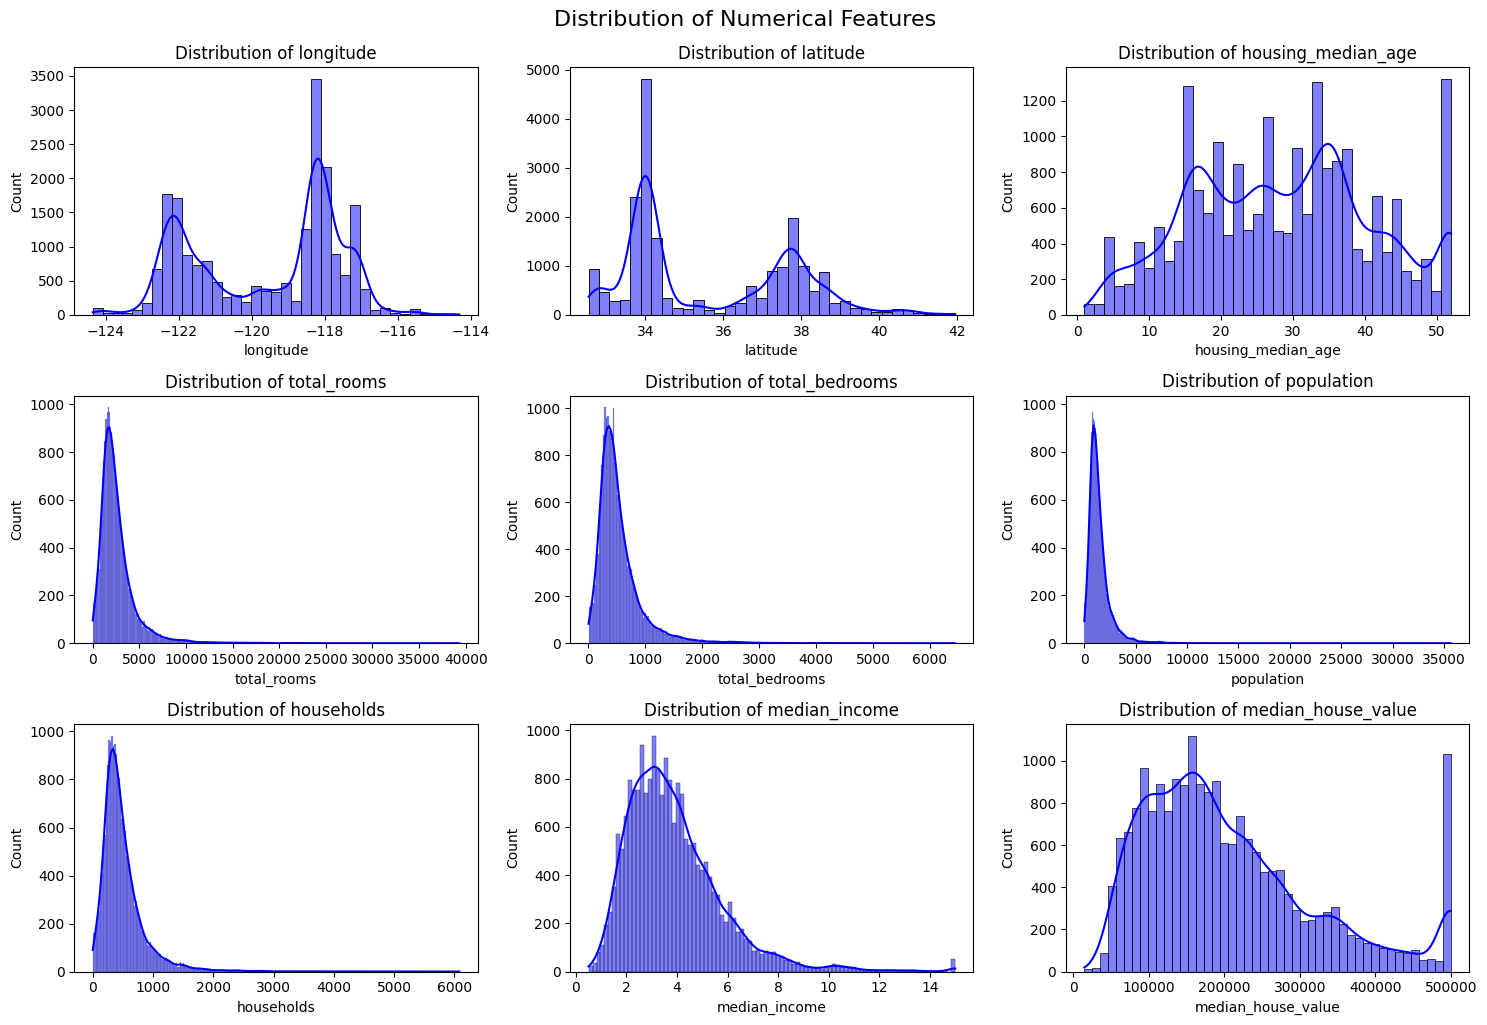

In [20]:
PlotDistribution(df, numerical_columns, 'Distribution of Numerical Features')

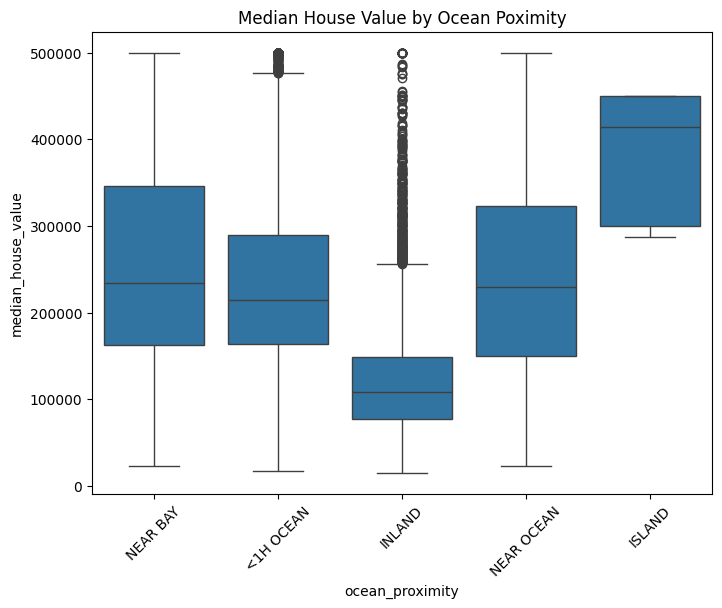

In [21]:
#Boxplot for Identifying Outliers in House Value
plt.figure(figsize = (8,6))
sb.boxplot(data = df, x = 'ocean_proximity', y = 'median_house_value')
plt.title('Median House Value by Ocean Poximity')
plt.xticks(rotation = 45)
plt.show()


In [22]:
#Splitting the data in X and y
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [23]:
X = pd.get_dummies(X, columns = ['ocean_proximity'], drop_first = True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [25]:
lrAlgorithm = LinearRegression()

In [26]:
lrAlgorithm.fit(X_train, y_train)

LinearRegression()

In [27]:
modelPrediction = lrAlgorithm.predict(X_test)

In [28]:
#Model Performance Evaluation
r2 = r2_score(modelPrediction, y_test)
#accuracy(modelPrediction, y_test)

In [29]:
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.44


In [30]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [31]:
dtr. fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
modelPrediction = dtr.predict(X_test)

In [33]:
r2 = r2_score(modelPrediction, y_test)

In [34]:
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.64


In [35]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
modelPrediction = rfg.predict(X_test)

In [37]:
r2 = r2_score(modelPrediction, y_test)

In [38]:
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.77


In [39]:
import pickle
writebinary = open('hpp1.pkl', 'wb')
pickle.dump(rfg, writebinary)
writebinary.close()

## NEW MODEL

In [41]:
#Drop the specified columns
df = df.drop(columns = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'])

KeyError: "['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'] not found in axis"

In [42]:
df

,housing_median_age,median_income,median_house_value,ocean_proximity
0,41.0,8.3252,452600.0,NEAR BAY
1,21.0,8.3014,358500.0,NEAR BAY
2,52.0,7.2574,352100.0,NEAR BAY
3,52.0,5.6431,341300.0,NEAR BAY
4,52.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND
20636,18.0,2.5568,77100.0,INLAND
20637,17.0,1.7000,92300.0,INLAND
20638,18.0,1.8672,84700.0,INLAND


In [43]:
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [44]:
#Performing one-hot encoding on the 'ocean_proximity' column
dfEncoded = pd.get_dummies(df, columns = ['ocean_proximity'], prefix = 'ocean')

In [45]:
dfEncoded.head()

,housing_median_age,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,41.0,8.3252,452600.0,False,False,False,True,False
1,21.0,8.3014,358500.0,False,False,False,True,False
2,52.0,7.2574,352100.0,False,False,False,True,False
3,52.0,5.6431,341300.0,False,False,False,True,False
4,52.0,3.8462,342200.0,False,False,False,True,False


In [46]:
#Splitting the data in X and y
X = dfEncoded.drop('median_house_value', axis = 1)
y = dfEncoded['median_house_value']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [48]:
#Using RandomForestRegressor Algorithm
rfg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
modelPrediction = rfg.predict(X_test)

In [50]:
#Model Performance Evaluation
r2 = r2_score(modelPrediction, y_test)
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.39


In [52]:
import pickle
writebinary = open("hpp2.pkl", "wb")
pickle .dump(rfg, writebinary)
writebinary.close()